# CNN的影像分類應用

- ref: https://www.twblogs.net/a/5e4f584abd9eee101e851e85
- 原來的資料下載連結是在kaggle: https://www.kaggle.com/c/dogs-vs-cats/data
- 也可以由我的雲端硬碟下載: https://drive.google.com/file/d/1I7o7PNFYhRDOKAJCgcq3FhYV5iDlkxtN/view

In [2]:
# 這是另外一個下載的方式，適合用在colab的練習
!wget --no-check-certificate "https://github.com/ADlead/Dogs-Cats/archive/master.zip" -O "cats-and-dogs.zip"

--2022-12-26 13:35:22--  https://github.com/ADlead/Dogs-Cats/archive/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ADlead/Dogs-Cats/zip/refs/heads/master [following]
--2022-12-26 13:35:22--  https://codeload.github.com/ADlead/Dogs-Cats/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cats-and-dogs.zip’

cats-and-dogs.zip       [ <=>                ] 817.02M  30.0MB/s    in 28s     

2022-12-26 13:35:50 (29.5 MB/s) - ‘cats-and-dogs.zip’ saved [856708511]



In [5]:
import zipfile

local_zip = './cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('data')
zip_ref.close()


In [7]:
!ls data/Dogs-Cats-master/data/

sampleSubmission.csv  test1  train


In [10]:
!cp -rip ./data/Dogs-Cats-master/data/train ./data/kaggle_original_data

In [11]:
import os, shutil
# The path to the directory where the original
# dataset was uncompressed（原始數據集解壓目錄的路徑）
#original_dataset_dir = 'data/kaggle_original_data'
original_dataset_dir = 'data/kaggle_original_data' #colab

# The directory where we will
# store our smaller dataset（保存較小數據集的目錄）
base_dir = 'data/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training, validation and test splits
#（分別對應劃分後的訓練、 驗證和測試的目錄）
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
# Directory with our training cat pictures(貓的訓練圖像目錄)
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures(狗的訓練圖像目錄)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    # Directory with our validation cat pictures(貓的驗證圖像目錄)
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures(狗的驗證圖像目錄)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    # Directory with our test cat pictures（貓的測試圖像目錄）
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our test dog pictures（狗的測試圖像目錄）
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)


- 25,000 images of dogs and cats

In [12]:
# Copy first 1000 cat images to train_cats_dir（將前 1000 張貓的圖像複製 到 train_cats_dir）
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to validation_cats_dir（將 接 下 來 500 張 貓 的 圖像 復 制到 validation_cats_dir）
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir（將 接 下 來的 500 張 貓 的 圖像 複製到 test_cats_dir）
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir（將前 1000 張狗的圖像複製 到 train_dogs_dir）
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir（將接下來 500 張狗的圖像復 制到 validation_dogs_dir）
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir（將接下來 500 張狗的圖像複製到 test_dogs_dir）
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    


- check our train / test data number

In [13]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


網絡中特徵圖的深度在逐漸增大（從 32 增大到 128），而特徵圖的尺寸在逐漸減小（從148×148 減小到 7×7）。這幾乎是所有卷積神經網絡的模式。


In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255（將所有圖像乘以 1/255 縮放）
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory（目標目錄）
        train_dir,
        # All images will be resized to 150x150（將所有圖像的大小調整爲 150×150）
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels（因爲使用了 binary_crossentropy損失，所以需要用二進制標籤）
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [19]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

<ipython-input-19-a7acfc8093a4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 120s 1s/step - loss: 0.6917 - acc: 0.5255 - val_loss: 0.6773 - val_acc: 0.6160
Epoch 2/30
100/100 [==============================] - 128s 1s/step - loss: 0.6568 - acc: 0.6165 - val_loss: 0.6469 - val_acc: 0.6140
Epoch 3/30
100/100 [==============================] - 114s 1s/step - loss: 0.6104 - acc: 0.6760 - val_loss: 0.6437 - val_acc: 0.6190
Epoch 4/30
100/100 [==============================] - 113s 1s/step - loss: 0.5787 - acc: 0.6915 - val_loss: 0.5956 - val_acc: 0.6830
Epoch 5/30
100/100 [==============================] - 113s 1s/step - loss: 0.5508 - acc: 0.7195 - val_loss: 0.5834 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 115s 1s/step - loss: 0.5320 - acc: 0.7345 - val_loss: 0.5776 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 113s 1s/step - loss: 0.4943 - acc: 0.7475 - val_loss: 0.5955 - val_acc: 0.6730
Epoch 8/30
100/100 [==============================] - 112s 1s/step - 

### save model 

In [20]:
model.save('cats_and_dogs_small_1.h5')

### draw a chart

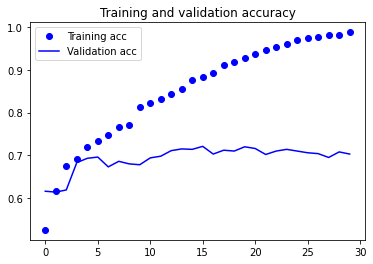

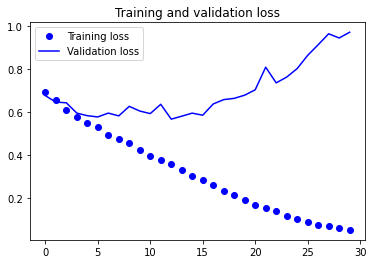

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()